# Plotting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Histograms
Sometimes plotting the histogram of data will not result in meaningful graphs. Taking the log of the data may improve the plot.

In [2]:
# Loading islands data from the lecture
path = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/islands.csv'
df = pd.read_csv(path, index_col=[0])
df.head()

,dat
Africa,11506
Antarctica,5500
Asia,16988
Australia,2968
Axel Heiberg,16


Plotting data without taking logs

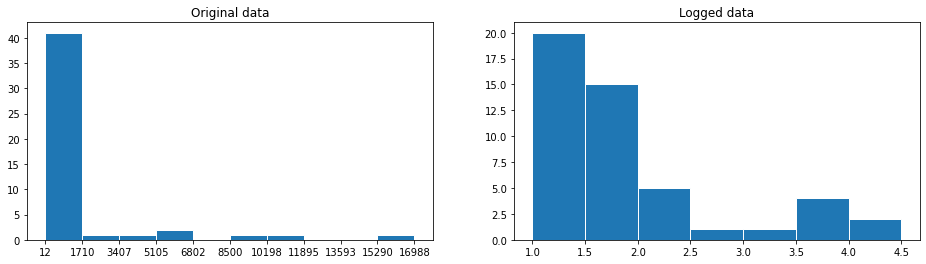

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# Plotting histogram without logging
ax0 = axs[0]
vals, edges = np.histogram(df['dat'], bins=10)
ax0.hist(df['dat'], bins=edges, edgecolor='w')
ax0.set_xticks(edges)
ax0.set_title('Original data')

ax1 = axs[1]
df['log_data'] = np.log10(df['dat'])
vals, edges = np.histogram(df['log_data'], bins=10)
bins = np.linspace(1, 4.5, 8)
ax1.hist(df['log_data'], bins=bins, edgecolor='w')
ax1.set_xticks(bins)
ax1.set_title('Logged data')
plt.show()

## Dot Charts
Dot charts can be used instead of box plots if the dataset size is small. Jittered plots can be used to increase the visibility of the plotted data points.

In [4]:
path = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/InsectSprays.csv'
df = pd.read_csv(path, index_col=[0])

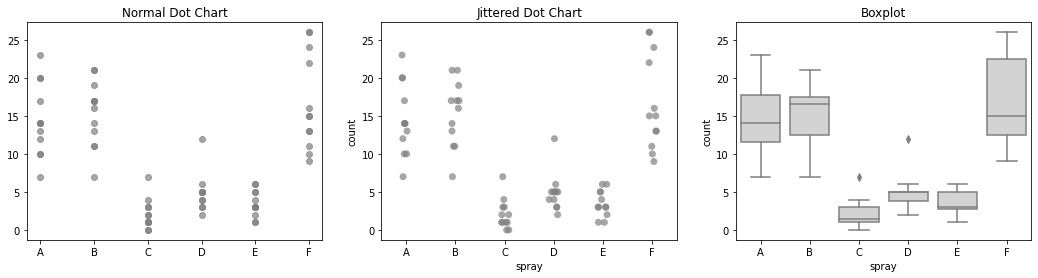

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Normal dot chart
ax0 = axs[0]
ax0.scatter(x='spray', y='count', data=df, color='gray', alpha=0.7)
ax0.set_title('Normal Dot Chart')

# Jittered dot chart
ax1 = axs[1]
sns.stripplot(x='spray', y='count', data=df, color='gray', size=7, alpha=0.7, ax=ax1)
ax1.set_title('Jittered Dot Chart')

# Box plot
ax2 = axs[2]
sns.boxplot(x='spray', y='count', data=df, ax=ax2, color='lightgray')
ax2.set_title('Boxplot')
plt.show()

### Kernel Density Estimation
* [Wikipedia Explanation](https://en.wikipedia.org/wiki/Kernel_density_estimation)
* [Scikit-Learn Package for KDE](https://scikit-learn.org/stable/modules/density.html)

In [6]:
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

In [7]:
# Population distribution parameters
mu = 2
sig = 1.5

# PDF function
x = np.linspace(-3, 7, 100)
y = norm.pdf(x, loc=mu, scale=sig)

# Drawing a sample from the population distrubution
n_samples = 200
X1 = np.random.normal(loc=mu, scale=sig, size=n_samples).reshape(-1, 1)

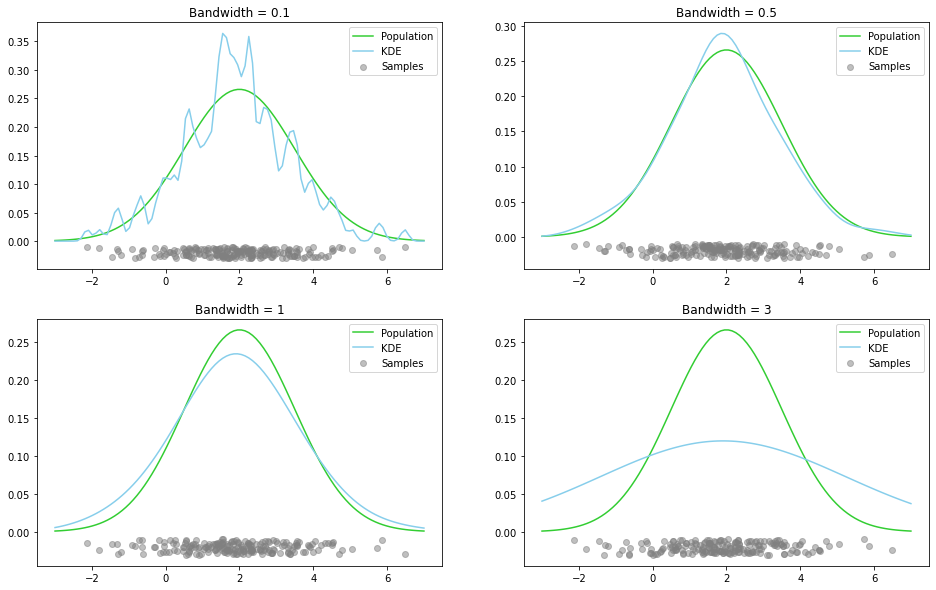

In [8]:
# Plotting kernel distribution estimations using different bandwidth values
bandwidth_arr = [0.1, 0.5, 1, 3]

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

for bandwidth, ax in zip(bandwidth_arr, axs):
    
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X1)

    log_dens = kde.score_samples(x.reshape(-1, 1))
    y_kde = np.exp(log_dens)


    # Plotting drawn samples
    y_samples = -0.02 + np.random.uniform(-0.01, 0.01, size=n_samples)
    ax.scatter(x=X1, y=y_samples, color='gray', label='Samples', alpha=0.5)

    # Plotting population distribution
    ax.plot(x, y.flatten(), color='limegreen', label='Population')

    # Plotting KDE distribution
    ax.plot(x, y_kde.flatten(), color='skyblue', label='KDE')
    
    ax.set_title('Bandwidth = {}'.format(bandwidth))
    
    ax.legend()
plt.show()

### QQ-Plots
QQ plots allow for comparing the data's distribution to a theoretical distribution.

Check [this page](https://xiongge.shinyapps.io/QQplots/) to practice interpreting a QQ plot

In [9]:
from scipy.stats import t, norm
import statsmodels.api as sm

In [10]:
def get_sample_quantiles(samples):
    '''
    Compute the quantile that each datapoint represents.
    Where the quantile is computed as the probability of getting
    a value less or equal than the studied datapoint from the given sample.
    '''
    n = float(len(samples))
    
    quantiles = []
    for rv in samples:
        cond = samples <=rv
        quantiles.append(cond.sum()/n)
        
    return np.array(quantiles)

In [11]:
def plot_qq(ax, samples, mu=0, std=1):
    # Computing the nth quantiles that each sample of this collection represents
    sample_quantiles = get_sample_quantiles(samples)

    # Removing 0, and 1 quantiles
    cond = (sample_quantiles != 0) & (sample_quantiles != 1)
    sample_quantiles = sample_quantiles[cond]
    samples = samples[cond]

    # Computing the quantiles from a standard normal distribution
    normal_quantiles = norm.ppf(sample_quantiles, loc=mu, scale=std)

    

    # Plotting the scatter of sample quantiles vs chosen dist. quantiles
    ax.scatter(x=normal_quantiles, y=samples, color='gray', alpha=0.5)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    lim = [min(xlim[0], ylim[0]), max(xlim[1], ylim[1])]
    
    # Plotting the reference line
    ax.plot(lim, lim, color='black')
    
    
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    
    ax.set_ylabel('Sample quantiles')
    ax.set_xlabel('Theoretical quantiles')

In [12]:
rand_num = np.random.randint(1000)
rand_num

236

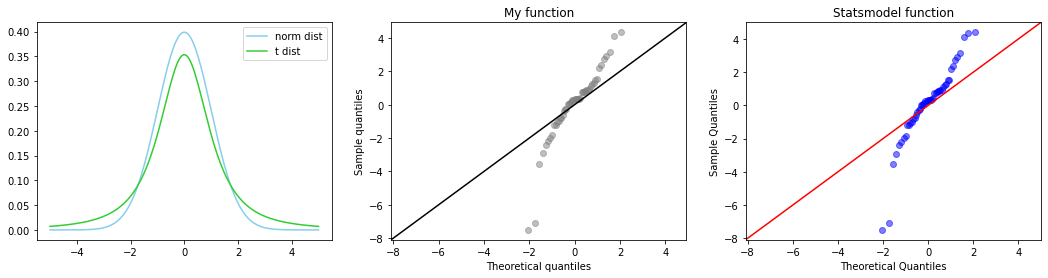

In [13]:
# Drawing a sample from a t-distribution
deg_free = 2

np.random.seed(seed=798)
samples = t.rvs(df=deg_free, size=50, loc=0)

mu = 0
std = 1

fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Plotting distributions
ax0 = axs[0]
x = np.linspace(-5, 5, 200)
y_norm = norm.pdf(x, loc=mu, scale=std)
y_t = t.pdf(x, df=deg_free)
ax0.plot(x, y_norm, color='skyblue', label='norm dist')
ax0.plot(x, y_t, color='limegreen', label='t dist')
ax0.legend()

# Plotting using plot_qq function
ax1 = axs[1]
plot_qq(ax1, samples, mu=mu, std=std)
ax1.set_title('My function')

# Plotting using statsmodels function
ax2 = axs[2]
sm.qqplot(samples, line='45', loc=mu, scale=std, alpha=0.5, ax=ax2)
ax2.set_title('Statsmodel function')

plt.show()